In [32]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("Cleaned_Fitness_Classes_Data.csv")

# Filter out cases where bookings or prices are zero (to avoid log issues)


In [34]:
df_elasticity = df[(df["Price (INR)"] > 0) & (df["Number Booked"] > 0)].copy()

# Take logs for elasticity model

In [35]:
df_elasticity["log_price"] = np.log(df_elasticity["Price (INR)"])
df_elasticity["log_booked"] = np.log(df_elasticity["Number Booked"])

# Define X (independent) and y (dependent)


In [38]:
X = df_elasticity[["log_price"]]
y = df_elasticity["log_booked"]

# Fit regression model


In [39]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Extract coefficient (this is elasticity!)


In [40]:
elasticity = model.coef_[0]

In [41]:
print("Price Elasticity of Demand:", elasticity)

Price Elasticity of Demand: -0.3246203188139803


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions


In [43]:
y_pred = model.predict(X)

# 1. R-squared


In [44]:
r2 = r2_score(y, y_pred)

# 2. Mean Squared Error and RMSE


In [45]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

In [46]:
print("Model Performance:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Model Performance:
R-squared: 0.0351
Mean Squared Error (MSE): 0.5870
Root Mean Squared Error (RMSE): 0.7662


# 3. Residual plots

In [47]:
residuals = y - y_pred

In [48]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

# Residuals vs Fitted

Text(0.5, 1.0, 'Residuals vs Fitted')

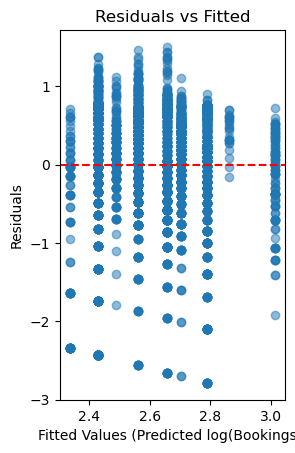

In [49]:
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted log(Bookings))")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

# Histogram of residuals

Text(0.5, 1.0, 'Distribution of Residuals')

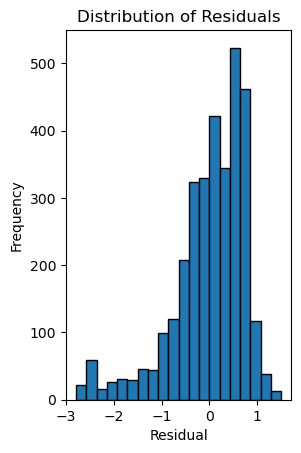

In [50]:
plt.subplot(1,2,2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")

In [51]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>